This notebook tests the creation of the example map from the original paper of the spatial reasoning architecture. At the moment the map that one would expect is not created but the resulting map only consists of two objects and not 5 objects. The map looks like the result of the first supplied sentence. It could be the case that the following sentences have to be supplied later than at the moment so that the system can reset its parameters before placing new objects in the scene. Also, in the experiment files from the seminar the target, reference and spatial relation of a sentence are supplied after each other and not in the same time. 

In [1]:
import sys
sys.path.append('../')
from read_json import load_from_json
from parse_cedar_objects import parse_cedar_params, make_connection
import nengo
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PROBE_ALL = False
SAVE_SIMULATION = False

In [3]:
objects, connections = load_from_json('../JSON/mental_imagery_extended.json')

Component Multiply 20 does not have 2 inputs, but 0!
The object Static Gain 23 does not have a source!


In [4]:
model = nengo.Network()

with model:
    nengo_objects = {}
    # create the nodes
    for ob_key in objects:
        name, instance = parse_cedar_params(objects[ob_key])
        instance.make_node()
        nengo_objects[name] = instance
    # create the connections
    for connection in connections:
        make_connection(connection[0][1], connection[1][1], nengo_objects)

In [23]:
len(model.nodes)

433

In [5]:
# the list contains all nodes that are plotted in the plotting widget of the cedar architecture
objects_to_probe = ['Reference Behavior.intention node',      # Reference processes
                    'Reference Behavior.CoS node', 
                    'Reference Field & Reference Production Nodes.intention node',
                    'Reference Field & Reference Production Nodes.CoS node',
                    'Reference Memory Nodes & Color Field.intention node',
                    'Reference Memory Nodes & Color Field.CoS node', 
                    'Target Behavior.intention node',        # Target processes
                    'Target Behavior.CoS node', 
                    'Target Field & Target Production Nodes.intention node',
                    'Target Field & Target Production Nodes.CoS node',
                    'Reference Memory Nodes & Color Field 2.intention node',
                    'Reference Memory Nodes & Color Field 2.CoS node',
                    'Match Field.intention node', 
                    'Match Field.CoS node',
                    'Relational Behavior.intention node',   # Spatial processes
                    'Relational Behavior.CoS node',
                    'OC Field and Spatial Production Nodes  .intention node',
                    'OC Field and Spatial Production Nodes  .CoS node',
                    'Condition of  Dissatisfaction .intention node', 
                    'Condition of  Dissatisfaction .CoS node',
                    'Spatial Memory Nodes.intention node', 
                    'Spatial Memory nodes.CoS node',
                    'Colour',                              # Color attention                                
                    'Projection',                          # Attention (space)
                    'Indeterminent ',                      # Spatial scene representation
                    'Reference',                           # Reference
                    'Target',                              # Target
                    'Object-centered ',                    # Relational
                    'Reference Red Memory',                # Reference color memory
                    'Reference Blue Memory', 
                    'Reference Cyan Memory', 
                    'Reference Green Memory', 
                    'Reference Orange Memory', 
                    'To the left of Memory',               # Spatial relation memory
                    'To the Right of Memory', 
                    'Above Memory', 
                    'Below Memory', 
                    'Target Red Memory',                   # Target color memory
                    'Target Blue Memory', 
                    'Target Cyan Memory', 
                    'Target Green Memory', 
                    'Target Orange Memory', 
                    'Reference Red Production',            # Reference color production
                    'Reference Blue Production', 
                    'Reference Cyan Production', 
                    'Reference Green Production', 
                    'Reference Orange Production',
                    'To the left of Production',           # Spatial relation production
                    'To the Right of Production', 
                    'Above Production', 
                    'Below Production',
                    'Target Red Production',               # Target color production
                    'Target Blue Production', 
                    'Target Cyan Production', 
                    'Target Green Production', 
                    'Target Orange Production']

In [6]:
with model:
    probes = {}
    for key in nengo_objects:
        if not PROBE_ALL:
            if key in objects_to_probe:
                probes[key] = nengo.Probe(nengo_objects[key].node, sample_every=0.05)
        else:
            probes[key] = nengo.Probe(nengo_objects[key].node, sample_every=0.05)

# set to correct value
nengo_objects['Reference: Blue'].strength = 5.1

In [7]:
sim = nengo.Simulator(model)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [8]:
# Supply first sentence: There is a cyan object above a green object
nengo_objects['Reference: Green'].active = True
nengo_objects['Target: Cyan'].active = True
nengo_objects['Spatial relation: Above'].active = True

sim.run(0.5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [9]:
# Activate imagine node
nengo_objects['Reference: Green'].active = False
nengo_objects['Target: Cyan'].active = False
nengo_objects['Spatial relation: Above'].active = False
nengo_objects['Action: Imagine'].active = True

sim.run(8.5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [10]:
# Supply second sentence: There is a red object to the left of the green object
nengo_objects['Reference: Green'].active = True
nengo_objects['Target: Red'].active = True
nengo_objects['Spatial relation: Left'].active = True

sim.run(0.5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [11]:
nengo_objects['Reference: Green'].active = False
nengo_objects['Target: Red'].active = False
nengo_objects['Spatial relation: Left'].active = False

sim.run(8.5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [12]:
# # Supply third sentence: There is a blue object to the right of the red object
# nengo_objects['Reference: Red'].active = True
# nengo_objects['Target: Blue'].active = True
# nengo_objects['Spatial relation: Right'].active = True

# sim.run(0.5)

In [13]:
# nengo_objects['Reference: Red'].active = False
# nengo_objects['Target: Blue'].active = False
# nengo_objects['Spatial relation: Right'].active = False

# sim.run(7.5)

In [14]:
# # supply fourth sentence: There is an orange object to the left of the blue object
# nengo_objects['Reference: Blue'].active = True
# nengo_objects['Target: Orange'].active = True
# nengo_objects['Spatial relation: Left'].active = True

# sim.run(0.5)

In [15]:
# nengo_objects['Reference: Blue'].active = False
# nengo_objects['Target: Orange'].active = False
# nengo_objects['Spatial relation: Left'].active = False

# sim.run(7.5)

In [16]:
sim.close()

In [17]:
# save simulation results
if SAVE_SIMULATION:
    from datetime import datetime
    import os 
    timestamp = str(datetime.now()).rsplit('.',1)[0]
    print(timestamp)

    os.mkdir('../simulation_data/%s' %timestamp)
    for ob_key in probes:
        file_name = ob_key.replace('/','_')
        np.save('../simulation_data/%s/%s_%s' %(timestamp, file_name, timestamp), sim.data[probes[ob_key]])

# Plot color activation

In [18]:
def plot_2dneuralfield(nf_data, time_points, colorbar=False):
    plt.figure(figsize=(10, 5))
    
    # plot 15 points in time 
    for i, time_point in enumerate(time_points):
        plt.subplot(3,5,i+1)
        plt.imshow(nf_data[time_point].reshape(50,50), cmap='jet')
        plt.title('%i ms' %(time_point*50))
        plt.xticks([])
        plt.yticks([])
        if colorbar:
            plt.colorbar()
    plt.show()
    
def plot_1dneuralfield(nf_data, time_points):
    plt.figure(figsize=(12,6))
    min = np.min(nf_data)
    max = np.max(nf_data)
    dif = max-min
    
    for i, tp in enumerate(time_points):
        plt.subplot(3,5,i+1)
        plt.title('%i ms' %(tp*50))
        plt.plot(nf_data[tp])
        plt.ylim(min-0.1*dif, max+0.1*dif)
        
    plt.tight_layout()
    plt.show()
    
def plot_3dneuralfield(nf_data, time_points):
    # length of time_points maximally 6
    plt.figure(figsize=(15,9))
    
    # create 6 plots of 7*8 images
    cols = 3*8+2
    rows = 2*7+2
    for i, tp in enumerate(time_points):
        min, max = np.min(nf_data[tp]), np.max(nf_data[tp])
        print('Min and Max values: %.4f  %.4f' %(min, max))
        tp_plot = (i//3)*8*cols + (i%3)*9 + 1
        for j in range(50):
            ind_plot = j//8*cols + (j%8)
            plt.subplot(rows, cols, tp_plot+ind_plot)
            plt.imshow(nf_data[tp,:,:,j], vmin=min, vmax=max, cmap='jet')
            plt.xticks([])
            plt.yticks([])
            if j == 3:
                plt.title("%i ms" %(tp*50))


In [19]:
time_points = np.linspace(50,sim.data[probes['Reference Blue Memory']].shape[0]-1,15, dtype=int)
tps_1d = np.linspace(50,sim.data[probes['Reference Blue Memory']].shape[0]-1,15, dtype=int)

from cedar_modules import AbsSigmoid
sigmoid = AbsSigmoid()

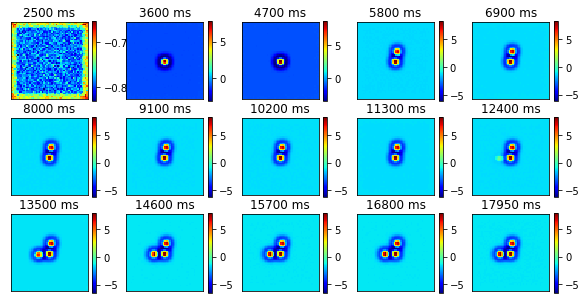

In [20]:
plot_2dneuralfield(sim.data[probes['Indeterminent ']], time_points, True)